<h1><center> MATH-GA 2840 HW#2</center></h1>
<h3 align="right">Yifei(Fahy) Gao yg1753</h3>

1. (PCA and linear regression)Consider a data set of n 2-dimensional data points x1,...,xn ∈ $R^2$ Assume that the dataset is centered. Our goal is to find a line in the 2D space that lies closest to the data. First, we apply PCA and consider the line in the direction of the first principal direction. Second, we use least squares to fit a linear regression model where $x_i[1]$ is a feature, and $x_i[2]$ the corresponding response. Are these lines the same? Describe each line in terms of the quantity it minimizes geometrically (e.g. sum of some distance from the points to the lines), and provide an example to illustrate your description.

These two lines are not the same. For the line of linear regression, it depends on the which variable we choose to regress on (e.g. regress y with x or regress x with y) and the line minimizes the euclidean distance (either horizontal distance or vertical distance) between point and its projection by least square. However, for the line of PCA, it is trying to minimize variance of the first principal component which is the orthogonal distance between x and the projection onto the first principal direction, since PCA is a non-supervised tool by using dimentional reduction.

Example:

In [1]:
import matplotlib.pylab as plt 
import numpy as np 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from pprint import pprint 
import seaborn as sns 
from matplotlib import collections as mc 

/Users/herculesgao/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


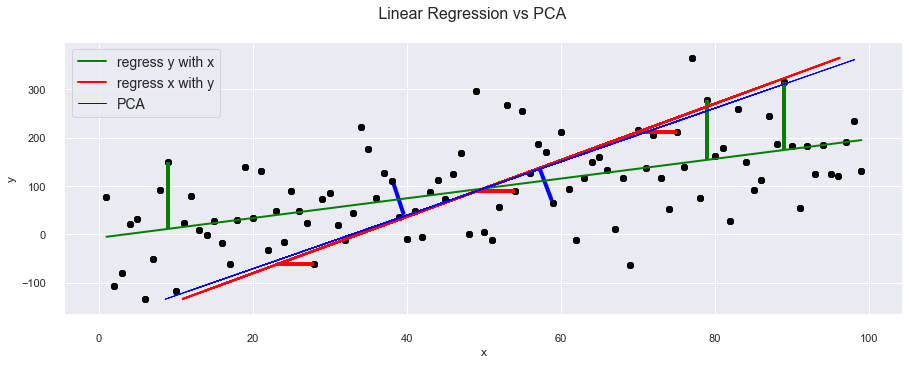

In [2]:
def plotline(x1,y1,x2,y2,c,l): 
    plt.scatter(x1, y1, color='black') 
    plt.plot(x2, y2, color=c, linewidth=l) 
    plt.axis('tight') 
    plt.xlabel('x') 
    plt.ylabel('y') 
    sns.despine(offset=10, trim=True)

%matplotlib inline 
np.random.seed(sum(map(ord, "aesthetics"))) 
sns.set_context('notebook') 
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = (15, 5) 
#regress y with x 
x=np.array(range(1,100))
x=x[:, np.newaxis]
y=10+2*x.ravel() 
y=y+np.random.normal(loc=0, scale=80, size=99) 

lin=LinearRegression() 
lin.fit(x,y) 
y_pred=lin.predict(x) 
y=y[:,np.newaxis] #Instantiate, fit and predict x~y 
lin=LinearRegression() 
lin.fit(y,x) 
x_pred=lin.predict(y) 
x,x_pred,y,y_pred=x.ravel(),x_pred.ravel(),y.ravel(),y_pred.ravel() 
indices=np.argsort(y-y_pred)[-8:-5]
#PCA
xy=np.array([x,y]).T
pca=PCA(n_components=1) 
xy_pca=pca.fit_transform(xy) 
xy_n=pca.inverse_transform(xy_pca) 
plotline(x,y,x,y_pred,'green',2)
plotline(x,y,x_pred,y,'red',2)
plt.suptitle('Linear Regression',fontsize=20) 
plt.legend(['regress y with x','regress x with y'], loc='best', fontsize=14) 

lines=[[(x[i],y[i]), (x[i],y_pred[i])] for i in indices] 
lines=mc.LineCollection(lines, colors='green', linewidths=4) 
plt.gca().add_collection(lines) 

indices_r=np.argsort(x-x_pred)[-40:-37]

lines=[[(x[i],y[i]), (x_pred[i],y[i])] for i in indices_r] 
lines=mc.LineCollection(lines, colors='red', linewidths=4) 
plt.gca().add_collection(lines) 

lines=[[(38.3, 102.9), (39.6,40)], [(58.8,70), (57.3, 133)]] 
lines=mc.LineCollection(lines, colors='blue', linewidths=4) 
plt.gca().add_collection(lines) 

plotline(x,y,xy_n[:,0],xy_n[:,1],'blue',1) 
plt.suptitle(' Linear Regression vs PCA',fontsize=16) 
plt.legend(['regress y with x','regress x with y', 'PCA'], loc='best', fontsize=14) 

plt.show()




2. (Heartbeat) We are interested in computing the best linear estimate of the heartbeat of a fetus in the presence of strong interference in the form of the heartbeat of the baby's mother. To simplify matters, let us assume that we only want to estimate the heartbeat at a certain moment. We have available a measurement from a microphone situated near the mother's belly and another from a microphone that is away from her belly. We model the measurements as
$$
\begin{array}{l}
\tilde{x}[1]=\tilde{b}+\tilde{m}+\tilde{z_{1}} \\
\tilde{x}[2]=\tilde{m}+\tilde{z}_{2}
\end{array}
$$
where $\tilde{b}$ is a random variable modeling the heartbeat of the baby, $\tilde{m}$ is a random variable modeling the heartbeat of the mother, and $\tilde{z}_{1}$ and $\tilde{z}_{2}$ model additive noise. From past data, we determine that $\tilde{b}, \tilde{m}, \tilde{z}_{1},$ and $\tilde{z}_{2}$ are all zero mean and uncorrelated with each other. The variances of $\tilde{b}, \tilde{z}_{1}$ and $\tilde{z}_{2}$ are equal to $1,$ whereas the variance of $\tilde{m}$ is much larger, it is equal to 10 .

(a) Compute the best linear estimate of $\tilde{b}$ given $\tilde{x}[1]$ in terms of MSE, and the corresponding MSE.

(b) Compute the best linear estimate of $\tilde{b}$ given $\tilde{x}$ in terms of MSE, and the corresponding MSE.

a) Since $E(\tilde{x}[1])$ is the best constant estimate of $\tilde{x}[1]$, and we are given $\tilde{x}[1]=\tilde{b}+\tilde{m}+\tilde{z_{1}}$ in terms of MSE, then: 

$$\tilde{b}(\tilde{x}[1])=\tilde{x}[1]*\Sigma_{\tilde{x}[1]}^{-1}\Sigma_{\tilde{x}\tilde{b}}=\tilde{x}[1]*E[\tilde{x}[1]^2]^{-1}*E[\tilde{x}[1]\tilde{b}]=\tilde{x}[1]*(E[\tilde{b}^2]+E[\tilde{m}^2]+E[\tilde{z_1}^2])^{-1}*E[(\tilde{b}+\tilde{m}+\tilde{z_{1}})\tilde{b}]$$

$$=\tilde{x}[1]*(E[\tilde{b}^2]+E[\tilde{m}^2]+E[\tilde{z_1}^2])^{-1}*E[(\tilde{b}^2+\tilde{m}\tilde{b}+\tilde{z_{1}}\tilde{b})]=\tilde{x}[1]*(1+1+10)^{-1}*(1+0+0)=\frac{\tilde{x}[1]}{12}$$

And the corresponding MSE: 

$$MSE=E[(\tilde{b}-\tilde{x}[1]^{T}\Sigma_{\tilde{x}[1]}^{-1}\Sigma_{\tilde{x}\tilde{b}})^2]=Var(\tilde{b})-\Sigma_{\tilde{x}\tilde{b}}^T\Sigma_{\tilde{x}[1]}^{-1}\Sigma_{\tilde{x}\tilde{b}}=1-1*\frac{1}{12}*1=\frac{11}{12}$$




b)
since $\tilde{b}(\tilde{x})=\Sigma_{\tilde{x}}^{-1}\Sigma_{\tilde{x}\tilde{b}}$

$$\Sigma_{\tilde{x}\tilde{b}}=\begin{bmatrix}
E[\tilde{x}[1]\tilde{b}] \\
E[\tilde{x}[2]\tilde{b}] 
\end{bmatrix}=\begin{bmatrix}
1 \\
0
\end{bmatrix}$$

$$E[\tilde{x}[2]^2]=E[\tilde{m}^2+\tilde{z_2}^2]=11$$

$$E[\tilde{x}[1]\tilde{x}[2]]=E[(\tilde{b}+\tilde{m}+\tilde{z_{1}})(\tilde{m}+\tilde{z}_{2})]=10$$
And from the part (a), we've already knew that $E[\tilde{x}[1]^2]=12$, then:

$$\Sigma_{x}=\begin{bmatrix}
12&10 \\
10&11
\end{bmatrix} \text{ and } \Sigma_{x}^{-1}=\frac{1}{12*11-10*10}\begin{bmatrix}
11&-10 \\
-10&12
\end{bmatrix}$$

Therefore $$\tilde{b}(\tilde{x})=\Sigma_{\tilde{x}}^{-1}\Sigma_{\tilde{x}\tilde{b}}=\frac{1}{12*11-10*10}\begin{bmatrix}
11&-10 \\
-10&12
\end{bmatrix}\begin{bmatrix}
1 \\
0
\end{bmatrix}=\frac{1}{32}\begin{bmatrix}
11 \\
-10
\end{bmatrix}=\begin{bmatrix}
\frac{11}{32} \\
\frac{-5}{16}
\end{bmatrix}$$

And the corresponding MSE:

$$MSE=E[(\tilde{b}-\tilde{x}^{T}\Sigma_{\tilde{x}}^{-1}\Sigma_{\tilde{x}\tilde{b}})^2]=Var(\tilde{b})-\Sigma_{\tilde{x}\tilde{b}}^T\Sigma_{\tilde{x}}^{-1}\Sigma_{\tilde{x}\tilde{b}}=1-\frac{1}{12*11-10*10}\begin{bmatrix}
1&0 \\
\end{bmatrix}\begin{bmatrix}
11&-10 \\
-10&12
\end{bmatrix}\begin{bmatrix}
1 \\
0
\end{bmatrix}=1-\begin{bmatrix}
\frac{11}{32}&\frac{-5}{16} 
\end{bmatrix}\begin{bmatrix}
1 \\
0
\end{bmatrix}=\frac{21}{32}$$

3. (Best unbiased linear estimator) Consider the linear regression model
$$
\tilde{y}=X^{T} \beta+\tilde{z}
$$
where $\tilde{y} \in \mathbb{R}^{n}, X \in \mathbb{R}^{p \times n}$ has rank $p, \beta \in \mathbb{R}^{p},$ and $\tilde{z} \in \mathbb{R}^{n}$ has mean zero and covariance
matrix $\Sigma_{z}=\sigma^{2} I$ for some $\sigma^{2}>0 .$ Here only $\tilde{z}$ and $\tilde{y}$ are random. We observe the values of $\tilde{y}$ and $X$ and must estimate $\beta .$ We consider the following question: What is the best unbiased linear estimator $C \tilde{y}$ of the coefficients $\beta ?$ Here $C$ is any $p \times n$ deterministic matrix. An estimator is unbiased if its mean is equal to $\beta$.

(a) What is the mean of the estimator $C \tilde{y} ?$


$$E[C\tilde{y}]=E[C(X^T\beta+\tilde{z})]=E[CX^T\beta+C\tilde{z}]=E[CX^T\beta]+E[C\tilde{z}]=E[CX^T\beta]\tag{since mean of z is 0}$$


Since based on the question the X, $\beta$, C are all deterministic, then: 
$$E[C\tilde{y}]=E[CX^T\beta]=CX^T\beta$$


(b) What is the covariance matrix of $C \tilde{y} ?$

$$\Sigma_{C\tilde{y}}=E[C\tilde{y}(C\tilde{y})^T]=E[(CX^T\beta+C\tilde{z})((\beta^TX C^T+\tilde{z}^TC^T)]=E[C\tilde{z}\tilde{z}^TC^T]=C\sigma^2IC^T\tag{the covariance of $\tilde{z}$ is $\sigma^2I$}$$


(c) Let us define $D:=C-\left(X X^{T}\right)^{-1} X .$ What must be true of $D$ so that $C \tilde{y}$ is an unbiased estimator of $\beta$ for all possible $\beta ?$ [Hint: Use part (a). Your answer will be a property of $D X^{T}$.]

Since if we want $\beta$ to be the unbiased estimator, 

$$E[C\tilde{y}]=\hat{\beta}=\beta$$
$$E[(D+(XX^T)^{-1}X)\tilde{y}]=DE[\tilde{y}]+(XX^T)^{-1}X)E[\tilde{y}]=DX^T\beta+(XX^T)^{-1}XX^T\beta=DX^T\beta+(X^T)^{-1}X^{-1}XX^T\beta=DX^T\beta+\beta$$

Since mean has to be equal to $\beta$, then

$$DX^T=0 \tag{$0*\beta+\beta=\beta$}$$

Thus, we can say that $DX^T$ has to be 0 in order to fulfill the question requirement.

(d) Let $\Sigma_{C}$ denote the covariance matrix of $C \tilde{y}$ and let $\Sigma_{\text {OLS }}$ denote the covariance matrix of $\left(X X^{T}\right)^{-1} X \tilde{y}$. Show that if $C \tilde{y}$ is an unbiased estimator of $\beta$ then
$$
v^{T} \Sigma_{C} v \geq v^{T} \Sigma_{\mathrm{OLS}} v
$$
for all $v \in \mathbb{R}^{p}$. That is, least squares yields the estimator with smallest variance in any direction $v$. [Hint: Use part (b) to compute the covariance of $\left(\left(X X^{T}\right)^{-1} X+D\right) \tilde{y}$ where $D$ is defined in (c).]



$v^T\Sigma_Cv$

$=v^T\sigma^2CC^Tv\,\text{...because of part a}$

$=v^T\sigma^2(D+(XX^T)^{-1}X)(D+(XX^T)^{-1}X)^Tv\,\text{ ...because of part b}$

$=v^T\sigma^2(DD^T+(XX^T)^{-1}XD^T+(XX^T)^{-1}XX^T(XX^T)^{-1}+DX^T(XX^T)^{-1})v$

$=v^T\sigma^2(DD^T+(XX^T)^{-1})v \,\text{...because part c: $DX^T=0$}$

And since we know the $\Sigma_{OLS}=(XX^T)^{-1}X\tilde{y}$, then: 

$v^T\Sigma_{OLS}v$

$=v^T(XX^T)^{-1}X\Sigma_{\tilde{z}}X^T(XX^T)^{-1}Xv$

$=v^T\sigma^2(XX^T)^{-1}v$

Then since $DD^T$ has to be positive-semidefinite also $\sigma^2>0$, 

$$v^T\Sigma_Cv=v^T\sigma^2(DD^T+(XX^T)^{-1})v\ge v^T\sigma^2(XX^T)^{-1}v=v^T\Sigma_{OLS}v \,\,\text{∎}$$

(e) Now suppose that the true regression model has extra features:
$$
\tilde{y}=X^{T} \beta+Z^{T} w+\tilde{z}
$$
where $Z \in \mathbb{R}^{k \times n}$ and $w \in \mathbb{R}^{k}$. Not knowing these features, you compute the least squares estimator
$$
\hat{\beta}=\left(X X^{T}\right)^{-1} X \tilde{y}
$$
Under what conditions on $X, Z$ is $\hat{\beta}$ still unbiased for all possible $w ?$

Based on the question: 

$$\beta=E[\hat{\beta}]$$
$$=E[(XX^T)^{-1}X(X^{T} \beta+Z^{T} w+\tilde{z})]$$
$$=E[(XX^T)^{-1}XX^{T}\beta+(XX^T)^{-1}XZ^{T} w+(XX^T)^{-1}X\tilde{z}]$$
$$=E[\beta]+E[(XX^T)^{-1}XZ^{T}]+E[(XX^T)^{-1}X\tilde{z}]$$

Since $E[(XX^T)^{-1}XZ^{T}]+E[(XX^T)^{-1}X\tilde{z}]=0$, we can conclude that: 
$$\text{this is true if } XX^T=0$$

4. (Climate modeling) In this problem we model temperature trends using a linear regression model. The file t_data. csv contains the maximum temperature measured each month in Oxford from $1853-2014 .$ We will use the first 150 years of data (the first $150 \cdot 12$ data points) as a training set, and the remaining 12 years as a test set.

In order to fit the evolution of the temperature over the years, we fit the following model
$$
y[t]=a+b t+c \cos (2 \pi t / T)+d \sin (2 \pi t / T)
$$
where $a, b, c, d \in \mathbb{R}, y[t]$ denotes the maximum temperature in Celsius during month $t$ of the dataset (with $t$ starting from 0 and ending at $162 \cdot 12-1)$.

(a) What is the number of parameters in your model and how many data points do you have to fit the model? Are you worried about overfitting?



There are 4 parameters: a, b, c, d. And there are 1800 (150*12) data points. I do not worried about overfitting since we have enough data and noises (a,b,c,d). 



(b) Fit the model using least squares on the training set to find the coefficients for values of $T$ equal to $1,2, \ldots, 20 .$ Which of these models provides a better fit? Explain why this is the case. In the remaining question we will fix $T$ to the value $T^{*}$ that provides a better fit.

In [3]:
import pandas as pd
import math

In [4]:
def create_x(T,t):
    X=np.empty((len(t),4))
    X[:,0]=np.ones(len(t))
    X[:,1]=t
    X[:,2]=np.cos(2*math.pi*t/T)
    X[:,3]=np.sin(2*math.pi*t/T)
    return X

def least_squares_coefficient(X,y):
    ols=np.linalg.pinv(X.T@X)@X.T@y
    return ols

def squared_loss(X,y,ols):
    n=X.shape[0]
    square_loss=(1/n)*np.linalg.norm(X@ols-y)**2
    return square_loss
raw_df=pd.read_csv("t_data.csv")
raw_df['month']=raw_df['date'].apply(lambda x: int(x[5:7]))
y_train=raw_df[raw_df['date']<'2003-01-01']['max_temp_C']
y_test=raw_df[raw_df['date']>='2003-01-01']['max_temp_C']

t_train=np.arange(0,150*12)
t_test=np.arange(150*12,162*12)
T_total=np.arange(1,21)


In [6]:
x_train={}
x_test={}
for T in T_total:
    x_train[T]=create_x(T,t_train)
    x_test[T]=create_x(T,t_test)
ols={}
test_l=[]
train_l=[]
for T in T_total:
    ols[T]=least_squares_coefficient(x_train[T],y_train)
    train_l.append(squared_loss(x_train[T],y_train,ols[T]))
    test_l.append(squared_loss(x_test[T],y_test,ols[T]))
    
T_star= T_total[train_l.index(min(train_l))]
mini_loss=min(train_l)
print("The perfect coefficient for T is:"+str(T_star)+" \nbecause it has the minimum loss on training set and the testing set loss is: "+str(mini_loss))
print("Also, we would get the same temperature respectively from the 12-month cycle per year.")

The perfect coefficient for T is:12 
because it has the minimum loss on training set and the testing set loss is: 3.062799750112011
Also, we would get the same temperature respectively from the 12-month cycle per year.


In [74]:
#ols[12]

array([ 1.34065138e+01,  4.35473508e-04, -7.61984133e+00, -4.83643251e-01])

We also can see from the following plot:

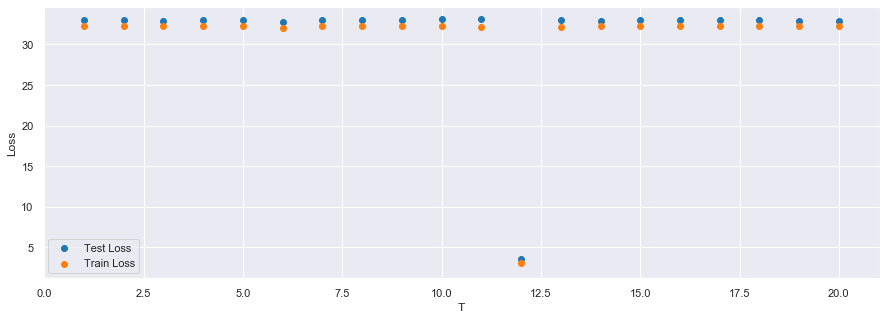

In [34]:
plt.scatter(T_total,test_l,label="Test Loss")
plt.scatter(T_total,train_l,label="Train Loss")
plt.xlabel('T')
plt.ylabel('Loss')
plt.legend()

Text(0, 0.5, 'Max Temperature')

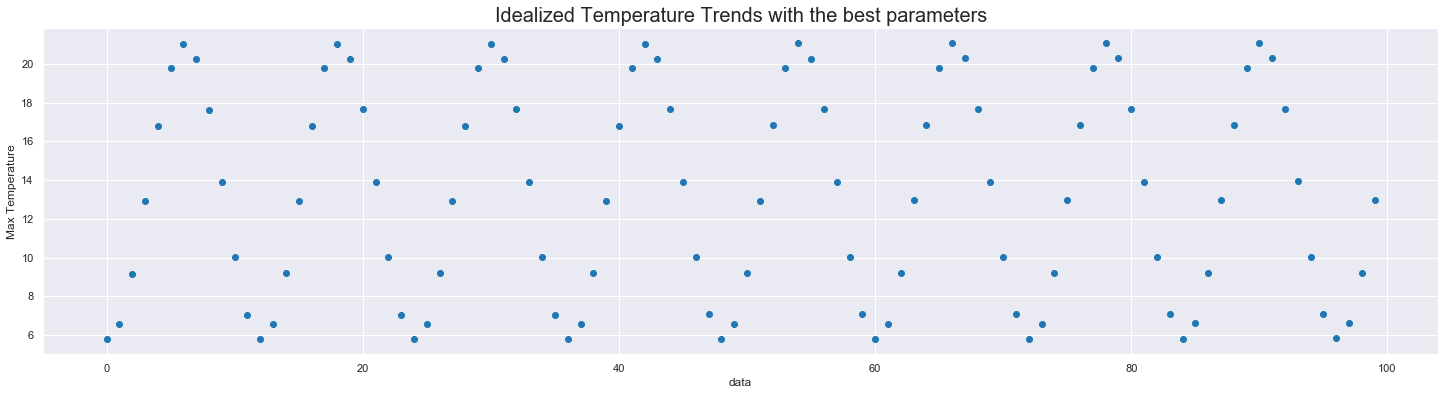

In [33]:
plt.figure(figsize=(25,6))
plt.title("Idealized Temperature Trends with the best parameters", fontsize= 20)
plt.scatter(t_train[0:100],(x_train[T_star]@ols[T_star])[0:100])
plt.xlabel('data')
plt.ylabel('Max Temperature')

(c) Produce two plots comparing the actual maximum temperatures with the ones predicted by your model for $T:=T^{*} ;$ one for the training set and one for the test set.


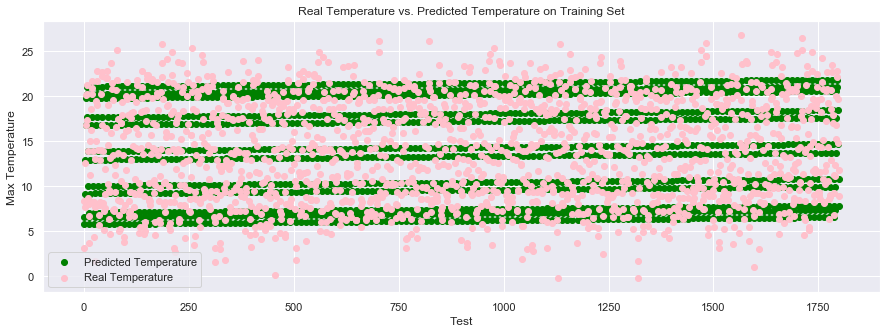

In [77]:
plt.scatter(t_train, x_train[T_star]@ols[T_star], label ="Predicted Temperature",color='green')
plt.scatter(t_train, y_train, label ="Real Temperature",color='pink')
plt.title("Real Temperature vs. Predicted Temperature on Training Set")
plt.xlabel('Test')
plt.ylabel('Max Temperature')
plt.legend()

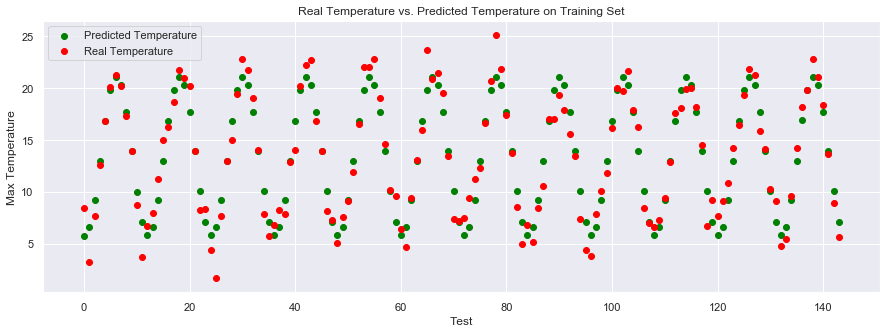

In [76]:
plt.scatter(t_train[:144], (x_train[T_star]@ols[T_star])[:144], label ="Predicted Temperature",color='green')
plt.scatter(t_train[:144], y_train[:144], label ="Real Temperature",color='red')
plt.title("Real Temperature vs. Predicted Temperature on Training Set")
plt.xlabel('Test')
plt.ylabel('Max Temperature')
plt.legend()

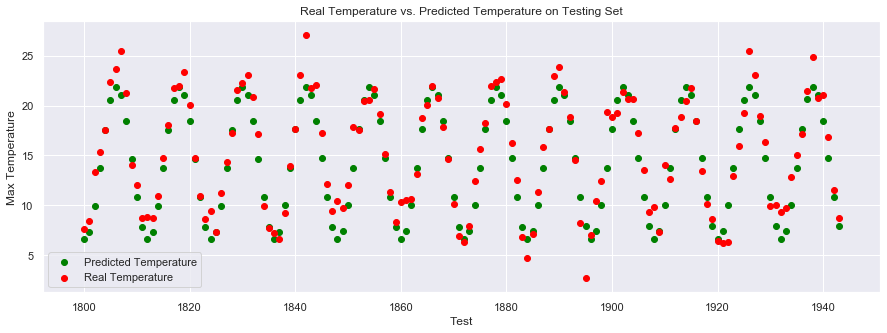

In [74]:
plt.scatter(t_test, x_test[T_star]@ols[T_star], label ="Predicted Temperature",color='green')
plt.scatter(t_test, y_test, label ="Real Temperature",color='red')
plt.title("Real Temperature vs. Predicted Temperature on Testing Set")
plt.xlabel('Test')
plt.ylabel('Max Temperature')
plt.legend()

These plots are very similar to each other and it seems that training set is more off than testing set from the last two plots.


(d) Fit the modified model

$$
y[t]=a+b t+d \sin \left(2 \pi t / T^{*}\right)
$$
and plot the fit to the training data as in the previous question. Explain why it is better to also include a cosine term in the model.


In [42]:
def modified_x(T,t):
    X=np.empty((len(t),3))
    X[:,0]=np.ones(len(t))
    X[:,1]=t
    X[:,2]=np.sin(2*math.pi*t/T)
    return X

In [49]:
x_train_mdf={}
x_test_mdf={}
for T in T_total:
    x_train_mdf[T]=modified_x(T,t_train)
    x_test_mdf[T]=modified_x(T,t_test)
#ols_mdf= least_squares_coefficient(,y_train)
x_train_mdf[T_star]
ols_mdf= least_squares_coefficient(x_train_mdf[T_star],y_train)
loss_mdf= squared_loss(x_train_mdf[T_star], y_train, ols_mdf)

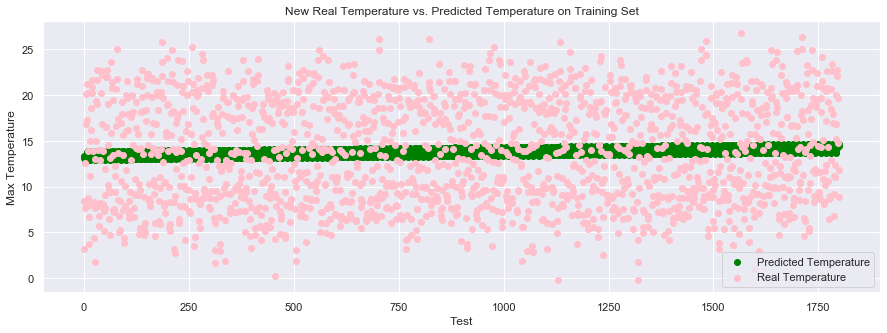

In [73]:
plt.scatter(t_train, x_train_mdf[T_star]@ols_mdf, label ="Predicted Temperature",color='green')
plt.scatter(t_train, y_train, label ="Real Temperature",color='pink')
plt.title("New Real Temperature vs. Predicted Temperature on Training Set")
plt.xlabel('Test')
plt.ylabel('Max Temperature')
plt.legend()

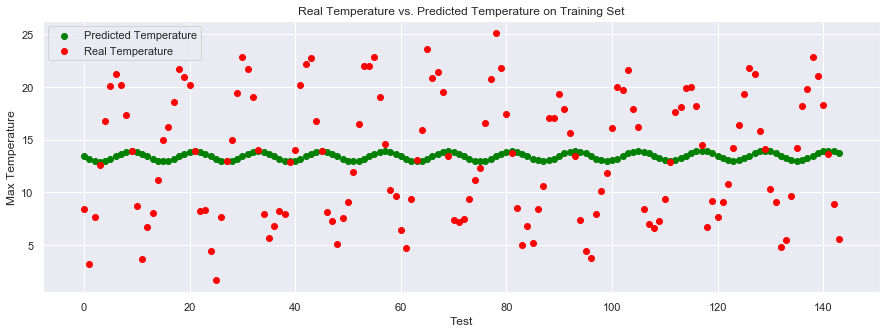

In [71]:
plt.scatter(t_train[:144], (x_train_mdf[T_star]@ols_mdf)[:144], label ="Predicted Temperature",color='green')
plt.scatter(t_train[:144], y_train[:144], label ="Real Temperature",color='red')
plt.title("Real Temperature vs. Predicted Temperature on Training Set")
plt.xlabel('Test')
plt.ylabel('Max Temperature')
plt.legend()

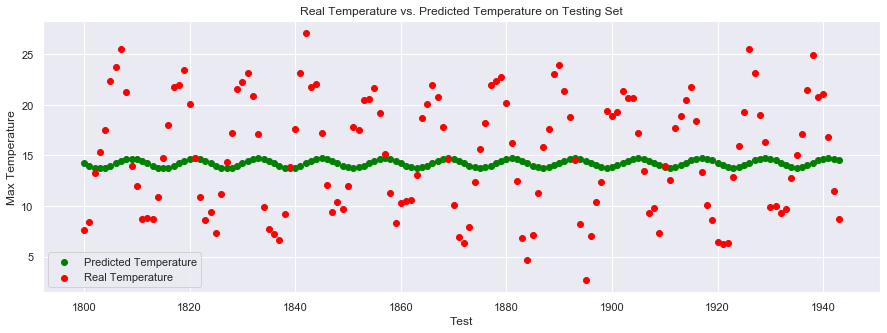

In [70]:
plt.scatter(t_test, x_test_mdf[T_star]@ols_mdf, label ="Predicted Temperature",color='green')
plt.scatter(t_test, y_test, label ="Real Temperature",color='red')
plt.title("Real Temperature vs. Predicted Temperature on Testing Set")
plt.xlabel('Test')
plt.ylabel('Max Temperature')
plt.legend()

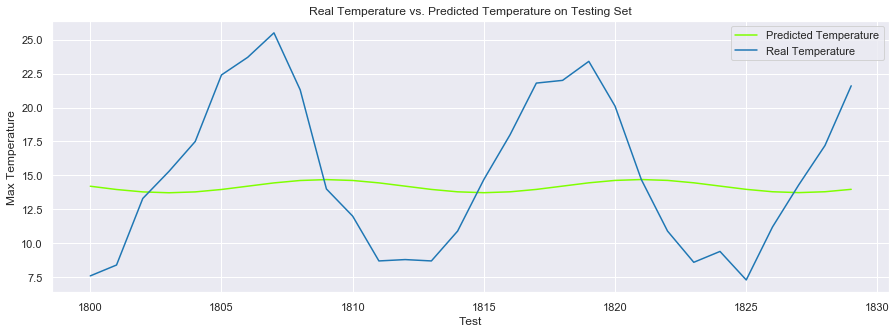

In [67]:
plt.plot(t_test[:30], (x_test_mdf[T_star]@ols_mdf)[:30], label ="Predicted Temperature",color='chartreuse')
plt.plot(t_test[:30], y_test[:30], label ="Real Temperature")
plt.title("Real Temperature vs. Predicted Temperature on Testing Set")
plt.xlabel('Test')
plt.ylabel('Max Temperature')
plt.legend()

By the trigonometry, $$sin(\frac{2\pi(t-t^{\prime})}{T^*})=sin(\frac{2\pi t}{T^*})cos(\frac{2\pi t^{\prime}}{T^*})-cos(\frac{2\pi t}{T^*})sin(\frac{2\pi t^{\prime}}{T^*})$$

And if we let $T^*=12$ and $t^{\prime}=3$, $$sin(\frac{2\pi(t-t^{\prime})}{T^*})=-cos(\frac{2\pi t}{T^*})$$

Then we can tell that by adding the cosine term, this model will give a much better result with 3 months advance. 

(e) Provide an intuitive interpretation of the coefficients $a, b, c$ and $d,$ and the corresponding features. According to your model, are temperatures rising in Oxford? By how much?

By using my model ($
y[t]=a+b t+c \cos (2 \pi t / T)+d \sin (2 \pi t / T)
$) we can get the max temperature for each year is: 


In [78]:
ols[T_star]

array([ 1.34065138e+01,  4.35473508e-04, -7.61984133e+00, -4.83643251e-01])

In [95]:
first_year_maxT=np.mean((x_train[T_star]@ols[T_star])[:12])
last_year_maxT=np.mean((x_train[T_star]@ols[T_star])[-12:])    
    
Temp_change=(last_year_maxT-first_year_maxT)/150    
Temp_change

0.0051908442194561625

Since the change is positive, we can conclude that the temperature is rising in Oxford by 0.5 percent. And based on the coefficient, we can guess that c can be the snow amount since it has the biggest negative effect, and d will be the raining amount since it also cause negative effect; for a, we can guess it could be increase rate of population and b could be the mountain fire rate. 